In [150]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from matplotlib import pyplot as plt
from matplotlib import dates
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [151]:
annual_highs=pd.read_csv('/home/thom/projects/flood/USGS Brays Bayou at MLK Blvd Houston TX.csv')
annual_highs['Date']=pd.to_datetime(annual_highs['peak_dt']).map(lambda x: dates.date2num(x))

In [152]:
mu, std = norm.fit(annual_highs['gage_ht'])
annual_highs['rank']=annual_highs['gage_ht'].rank()
annual_highs['cumprob']=annual_highs['rank']/len(annual_highs)

In [153]:
#calculate probability density function and cumulative probability function
xmin = annual_highs['gage_ht'].min()-std
xmax = annual_highs['gage_ht'].max()+std
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
cp = norm.cdf(x, mu, std)
one_hundred_year_flood=norm.ppf(0.99,mu,std)

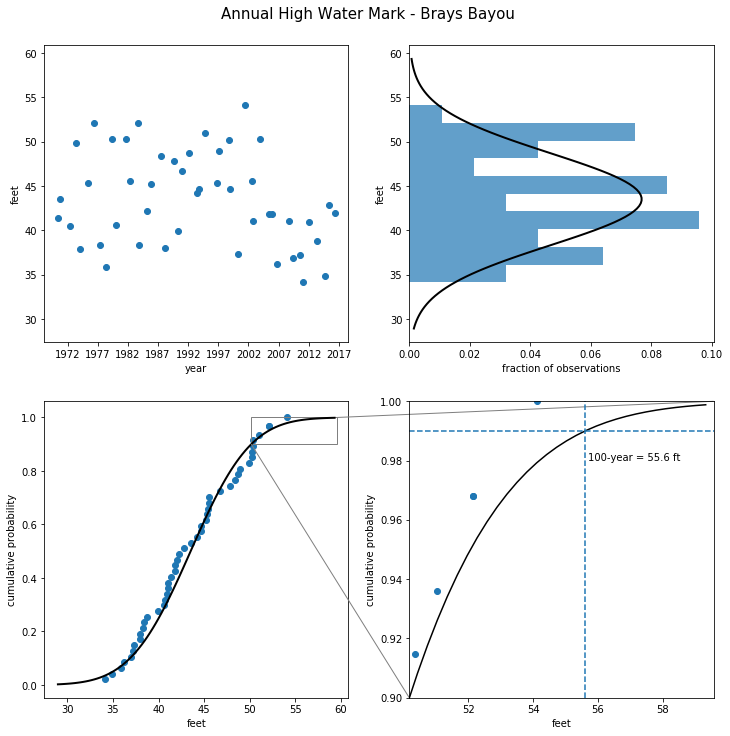

In [154]:
fig=plt.figure(figsize=(12,12))
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222, sharey=ax1)
ax3=fig.add_subplot(223) 
ax4=fig.add_subplot(224) 

# timeline
ax1.scatter(annual_highs['Date'],annual_highs['gage_ht'])
ax1.xaxis.set_major_locator(dates.AutoDateLocator())
ax1.xaxis.set_major_formatter(dates.AutoDateFormatter(locator=dates.AutoDateLocator()))
ax1.set_ybound(xmin-1,xmax+1)
ax1.set(xlabel='year',ylabel='feet')

#histogram
ax2.hist(annual_highs['gage_ht'], orientation='horizontal', bins=10, normed=True, alpha=0.7)
ax2.plot(p, x, 'k', linewidth=2)
ax2.set(xlabel='fraction of observations',ylabel='feet')


#cumulative
ax3.scatter(annual_highs['gage_ht'],annual_highs['cumprob'])
ax3.plot(x, cp, 'k', linewidth=2)
ax3.set(xlabel='feet',ylabel='cumulative probability')

#zoom in for 2nd subplot
ax4.scatter(annual_highs['gage_ht'],annual_highs['cumprob'])
ax4.plot(x,cp,'k')
ax4.set(xlim=(norm.ppf(0.90,mu,std),norm.ppf(0.999,mu,std)),ylim=(0.9,1.0),xlabel='feet',ylabel='cumulative probability')
ax4.axhline(0.99,linestyle='dashed')
ax4.axvline(one_hundred_year_flood, linestyle='dashed')
ax4.annotate(xy=(one_hundred_year_flood+0.1,0.98),s='100-year = '+"%0.1f ft" % one_hundred_year_flood)
mark_inset(ax3, ax4, loc1=1, loc2=3, fc="none", ec="0.5")

#set title
plt.suptitle('Annual High Water Mark - Brays Bayou',x=0.5, y=0.925, fontsize=15)
plt.show()

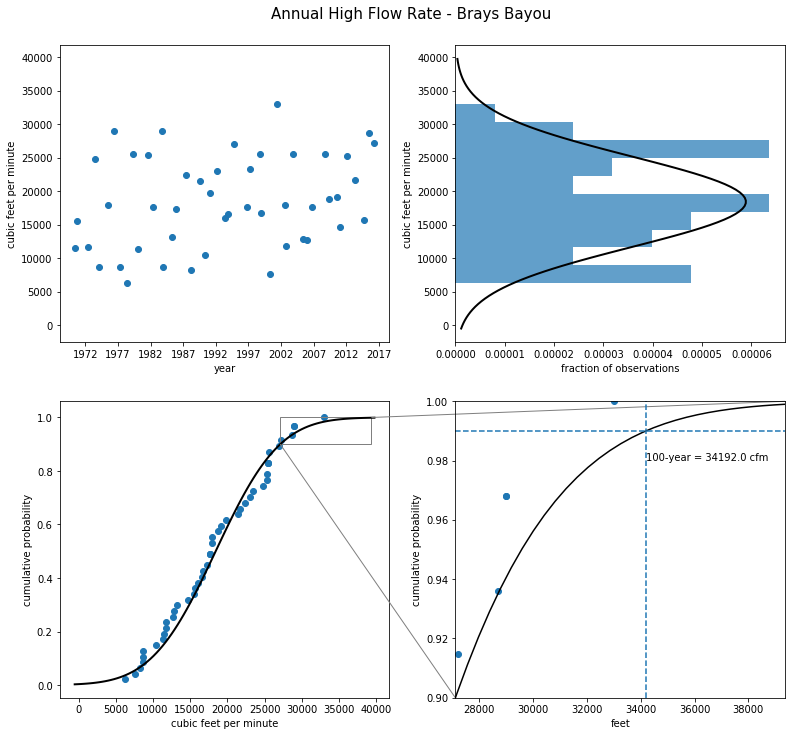

In [155]:
#fit to normal
mu, std = norm.fit(annual_highs['peak_va'])
annual_highs['rank']=annual_highs['peak_va'].rank()
annual_highs['cumprob']=annual_highs['rank']/len(annual_highs)

#calculate probability density function and cumulative probability function
xmin = annual_highs['peak_va'].min()-std
xmax = annual_highs['peak_va'].max()+std
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
cp = norm.cdf(x, mu, std)
one_hundred_year_flood=norm.ppf(0.99,mu,std)

fig=plt.figure(figsize=(13,12))
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222, sharey=ax1)
ax3=fig.add_subplot(223) 
ax4=fig.add_subplot(224) 

# timeline
ax1.scatter(annual_highs['Date'],annual_highs['peak_va'])
ax1.xaxis.set_major_locator(dates.AutoDateLocator())
ax1.xaxis.set_major_formatter(dates.AutoDateFormatter(locator=dates.AutoDateLocator()))
ax1.set_ybound(xmin-1,xmax+1)
ax1.set(xlabel='year',ylabel='cubic feet per minute')

#histogram
ax2.hist(annual_highs['peak_va'], orientation='horizontal', bins=10, normed=True, alpha=0.7)
ax2.plot(p, x, 'k', linewidth=2)
ax2.set(xlabel='fraction of observations',ylabel='cubic feet per minute')


#cumulative
ax3.scatter(annual_highs['peak_va'],annual_highs['cumprob'])
ax3.plot(x, cp, 'k', linewidth=2)
ax3.set(xlabel='cubic feet per minute',ylabel='cumulative probability')

#zoom in for 2nd subplot
ax4.scatter(annual_highs['peak_va'],annual_highs['cumprob'])
ax4.plot(x,cp,'k')
ax4.set(xlim=(norm.ppf(0.90,mu,std),norm.ppf(0.999,mu,std)),ylim=(0.9,1.0),xlabel='feet',ylabel='cumulative probability')
ax4.axhline(0.99,linestyle='dashed')
ax4.axvline(one_hundred_year_flood, linestyle='dashed')
ax4.annotate(xy=(one_hundred_year_flood+0.1,0.98),s='100-year = '+"%0.1f cfm" % one_hundred_year_flood)
mark_inset(ax3, ax4, loc1=1, loc2=3, fc="none", ec="0.5")

#set title
plt.suptitle('Annual High Flow Rate - Brays Bayou',x=0.5, y=0.925, fontsize=15)
plt.show()

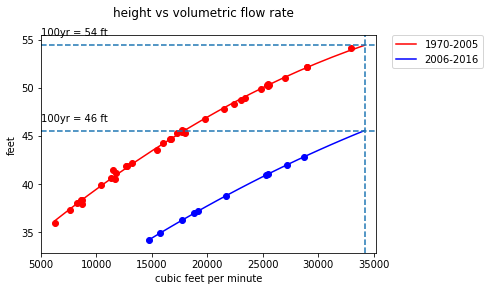

In [311]:
groups=annual_highs.groupby('construction')
colorMap={'1970-2005':'r',
          '2006-2016':'b'}

fig=plt.figure()
ax=fig.add_subplot(111)

for name, group  in groups:
    group=group.sort_values('peak_va')
    x=group['peak_va']
    y=group['gage_ht']
    c=colorMap[name]
    fit = np.poly1d(np.polyfit(x,y,2)) 
    x_out = np.linspace(x.min(), one_hundred_year_flood, 20)
    y100=fit(one_hundred_year_flood)
    ax.scatter(x,y,c=c,label=None)
    ax.plot(x_out, fit(x_out), c=c, label=name)
    ax.axhline(y100,linestyle='dashed',label=None)
    ax.annotate('100yr = %.0f ft'%y100,xy=(5000,y100+1),fontsize=10)
    
ax.axvline(one_hundred_year_flood, linestyle='dashed')
ax.set_xlim(5000,one_hundred_year_flood+1000)
ax.set_xlabel('cubic feet per minute')
ax.set_ylabel('feet')
L=ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0, fontsize=10)
plt.suptitle('height vs volumetric flow rate')
plt.show()